In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold

In [2]:
%matplotlib inline

In [3]:
data = datasets.fetch_openml(
                'mnist_784',
                version=1,
                return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

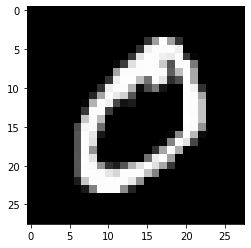

In [4]:
single_image = pixel_values[1, :].reshape(28, 28)
plt.imshow(single_image, cmap='gray')

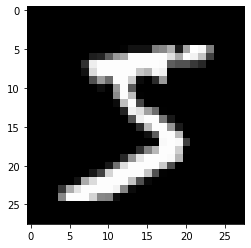

In [5]:
single_image = pixel_values[0, :].reshape(28, 28)
plt.imshow(single_image, cmap='gray')

In [6]:
pixel_values[:3000, :].shape

(3000, 784)

In [7]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [8]:
print(type(transformed_data))
print(transformed_data.shape)

<class 'numpy.ndarray'>
(3000, 2)


In [9]:
tsne_df = pd.DataFrame(
np.column_stack((transformed_data, targets[:3000])),
columns=["x", "y", "targets"]
)
tsne_df.head()

,x,y,targets
0,-5.281551,-28.952768,5.0
1,-26.105896,-68.069321,0.0
2,-42.503582,35.580391,4.0
3,38.893967,26.663395,1.0
4,-14.770573,35.433247,9.0


In [10]:
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)
tsne_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x        3000 non-null   float64
 1   y        3000 non-null   float64
 2   targets  3000 non-null   int32  
dtypes: float64(2), int32(1)
memory usage: 58.7 KB


In [11]:
tsne_df.head()

,x,y,targets
0,-5.281551,-28.952768,5
1,-26.105896,-68.069321,0
2,-42.503582,35.580391,4
3,38.893967,26.663395,1
4,-14.770573,35.433247,9


d:\miniconda3\envs\aaamlp\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


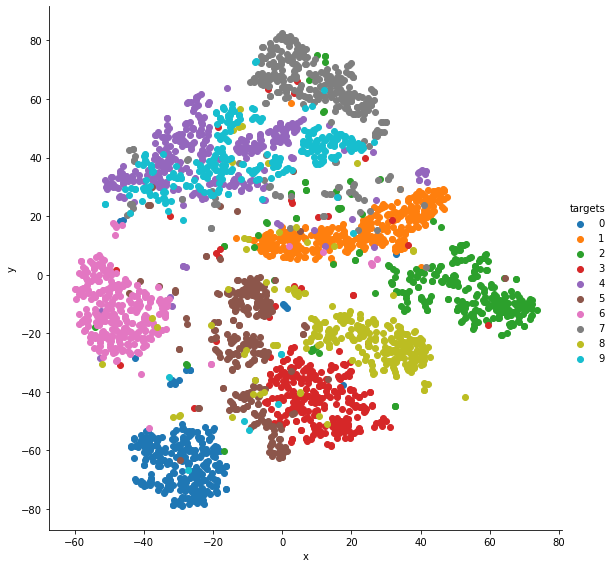

In [12]:
grid = sns.FacetGrid(tsne_df, hue="targets", size=8)
grid.map(plt.scatter, "x", "y").add_legend()